Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        43
           1       0.76      0.76      0.76        59
           2       0.33      0.45      0.38        42
           3       0.42      0.30      0.35        56

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.57      0.56      0.56       200



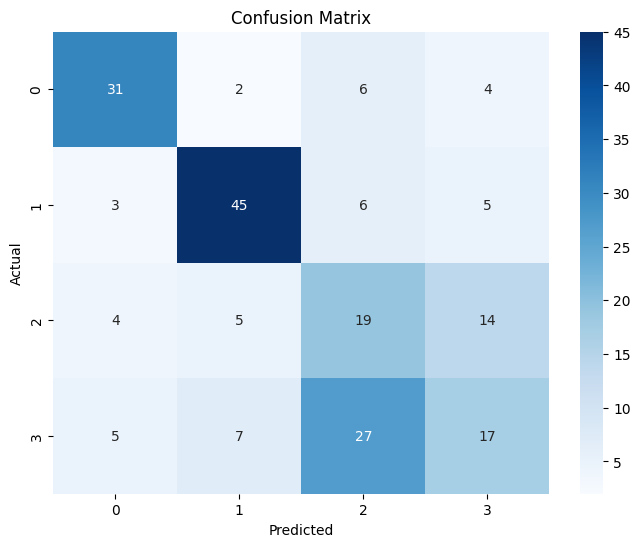

✅ Model and encoders saved.


In [7]:
# train_model.py
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('insurance_recommendation_dataset_inr.csv')

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object' and col != 'user_id':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Define features and target
X = df.drop(columns=['user_id', 'interested_policy'])
y = df['interested_policy']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save model and encoders
joblib.dump(clf, 'model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
print("✅ Model and encoders saved.")


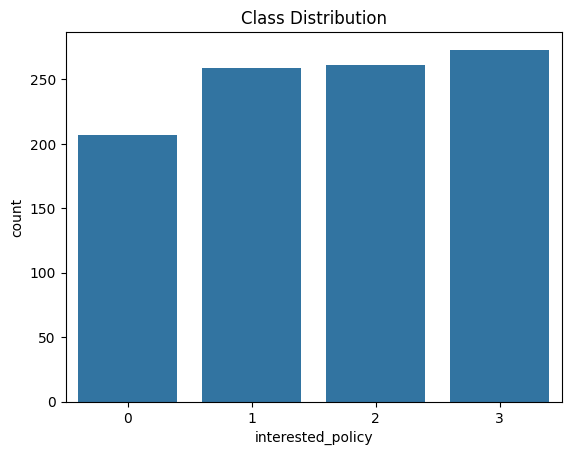

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y is your target column
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.65      0.67        43
           1       0.80      0.80      0.80        59
           2       0.27      0.33      0.30        42
           3       0.37      0.32      0.34        56

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.54      0.54      0.54       200



In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [6, 10, 15],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_


Best Params: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
df['premium_to_income'] = df['premium'] / df['annual_income_inr']
df['age_range'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 100], labels=[0, 1, 2, 3])


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print("Average F1 Score:", scores.mean())


Average F1 Score: 0.5482499173724584


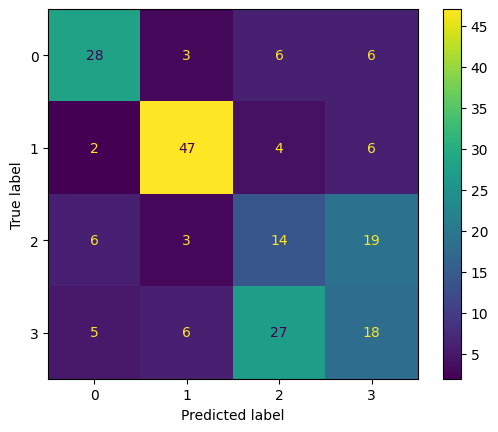

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [17]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.70      0.71        43
           1       0.76      0.76      0.76        59
           2       0.33      0.38      0.35        42
           3       0.44      0.39      0.42        56

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.57      0.56      0.57       200



In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [19]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    learning_rate=0.1,
    max_depth=8,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_resampled, y_resampled)


c:\Users\Harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [02:10:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=4, ...)

In [21]:
df['premium_to_income'] = df['premium'] / df['annual_income_inr']
df['age_range'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 100], labels=[0, 1, 2, 3])


In [26]:
import pandas as pd
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 100], labels=["18-30", "31-45", "46-60", "60+"])
# Safe check using isinstance and str conversion
df['has_existing_health_policy'] = df['existing_policies'].apply(
    lambda x: 1 if isinstance(x, str) and 'health' in x.lower() else 0
)

df['policy_bundle_count'] = df['existing_policies'].apply(
    lambda x: len(str(x).split(',')) if pd.notnull(x) and str(x).lower() != 'none' else 0
)


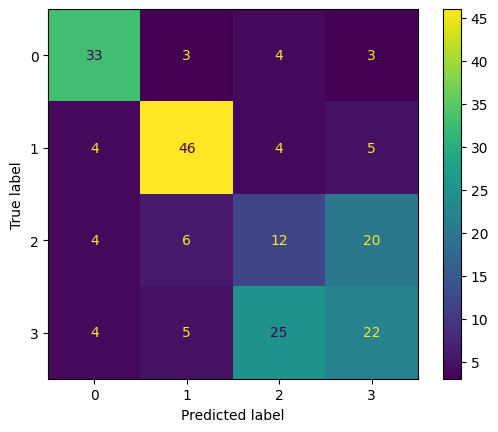

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [28]:
import joblib
joblib.dump(xgb_model, "insurance_model.pkl")


['insurance_model.pkl']

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        43
           1       0.77      0.78      0.77        59
           2       0.27      0.29      0.28        42
           3       0.44      0.39      0.42        56

    accuracy                           0.56       200
   macro avg       0.55      0.56      0.55       200
weighted avg       0.56      0.56      0.56       200

